# 미니 프로젝트 : Scikit-learn  Toy Dataset 분류

![image](https://user-images.githubusercontent.com/84179578/125786287-901e2add-5355-4a50-ab34-6cb64d2accad.png)

Scikit-learn 라이브러리에서는 Toy Datasts(연습용 데이터셋) 와 Real World Datasets(실제 데이터셋) 을 제공한다.

이번에는 Toy datasets 중 다음의 세가지 데이터 셋을 이용하여 __여러 분류모델을 사용__ 해보고, 해당 데이터 마다 __어떤 분류모델이 가장 높은 성능__ 을 보이는지 확인해보겠다.

- `Optical recognition of handwritten digits dataset` : 손글씨 이미지 데이터
- `Wine recognition dataset`: 와인 데이터
- ` Breast cancer wisconsin (diagnostic) dataset` : 유방암 데이터

# 1. 손글씨 이미지 데이터 분류

## 데이터 불러오기

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score,confusion_matrix, plot_confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits = load_digits()    # 데이터 불러오기

In [3]:
print(dir(digits))  # dir : 객체가 어떤 변수와 메소드를 가지고 있는지 나열

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


불러온 이미지를 살려보자.

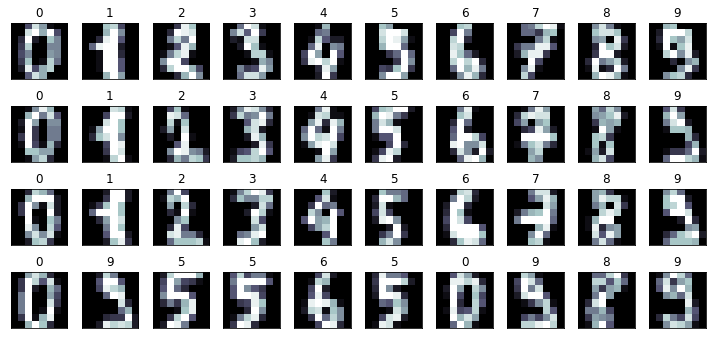

In [4]:
np.random.seed(0)
N = 4
M = 10
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone, interpolation="none")
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[digits.target[k]])
plt.tight_layout()
plt.show()

위와 같이 손 글씨 이미지 데이터이고 0~9까지의 숫자로 라벨링된 것을 볼 수 있다.  
다음으로 `DESCR` 를 통해 데이터에 대한 설명을 보자

In [5]:
print(digits.DESCR)  # 데이터에 대한 설명

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

`DESCR` 함수를 통해 해당 데이터에 대한 자세한 설명을 살펴보면 다음과 같은 정보들을 얻을수 있다.
- 총 5620 개의 데이터 -> DESCR 설명 중 오류 -> 총 1797개의 데이터
- feature 은 64개의 픽셀값 (8x8 이미지)
- 10개의 라벨
- 결측치 없음

In [6]:
digits.target_names   # 라벨 값 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
digits_data = digits.data      # digits feature데이터 저장 저장
digits_target = digits.target  # digits 의 라벨 저장

In [8]:
print(digits_data.shape)
print(digits_target.shape)

(1797, 64)
(1797,)


여기서 `shape` 을 통해 데이터를 보면 총 1797개의 데이터가 있음을 알 수 있다.  
즉, `DESCR`를 이용해 불러온 데이터에 대한 설명 중 오류가 있었는 듯 싶다.  
`shape` 을 통해 한번 더 확인을 해봄으로써 데이터에 대한 정확한 이해를 할 수 있다.

## 데이터 다루기 (training set, test set 나누기)

In [9]:
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
digits_df["label"] = digits.target
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [11]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_target, test_size = 0.2, random_state = 7)

print(f'X_train 개수 : {len(X_train)}, X_test 개수 :{len(X_test)}')

X_train 개수 : 1437, X_test 개수 :360


## 모델 학습시키기
### Case1. Decision Tree 모델 사용

In [12]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state = 32)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

digit_acc={}   # 손글씨 데이터의 정확도 dictionary
digit_acc['Decision Tree'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(digit_acc['Decision Tree'])

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360

0.8555555555555555


### Case 2. Random Forest 모델 사용

In [13]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state = 32)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

digit_acc['Random Forest'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(digit_acc['Random Forest'])

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360

0.9638888888888889


### Case 3. SVM 모델 사용

In [14]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

digit_acc['SVM'] = accuracy_score(y_test, y_pred)


print(classification_report(y_test, y_pred))
print(digit_acc['SVM'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

0.9888888888888889


### Case 4. SGD Classifier 모델 사용

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

digit_acc['SGD Classifier'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(digit_acc['SGD Classifier'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.93      0.90      0.92        42
           2       0.98      1.00      0.99        40
           3       0.97      0.88      0.92        34
           4       0.97      0.97      0.97        37
           5       0.80      1.00      0.89        28
           6       0.96      0.96      0.96        28
           7       0.97      0.94      0.95        33
           8       0.97      0.84      0.90        43
           9       0.86      0.94      0.90        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360

0.9416666666666667


### Case 5. Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

digit_acc['Logistic Regression'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(digit_acc['Logistic Regression'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

0.9527777777777777


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 모델 성능 평가

모델의 성능을 평가하는 척도는 손글씨의 숫자가 뭔지 예측하는 것이므로 전체 개수 중 맞은 것의 개수의 수치인 __정확도(accuracy)__ 를 이용하겠다.

In [17]:
for i in digit_acc.items():
    print("{0:<20} : {1}".format(i[0],i[1]))

Decision Tree        : 0.8555555555555555
Random Forest        : 0.9638888888888889
SVM                  : 0.9888888888888889
SGD Classifier       : 0.9416666666666667
Logistic Regression  : 0.9527777777777777


__손글씨 이미지 데이터는 SVM 모델을 사용했을때 모델의 성능이 가장 높게 나온 것을 확인 할 수 있다.__

__손글씨 이미지 데이터의 SVM 모델을 사용했을 때 정확도(accuracy) 는 약 98.89% 이다.__

----

# 2. 와인 데이터 분류

## 데이터 불러오기

In [18]:
from sklearn.datasets import load_wine

wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [19]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

`DESCR` 함수를 통해 해당 데이터에 대한 자세한 설명을 살펴보면 다음과 같은 정보들을 얻을수 있다.
- 총 178 개의 데이터
- feature 은 총 13개
- 3개의 라벨 - 0 (59개), 1 (71개), 2 (48개))
- 결측치 없음

In [20]:
wine_data = wine.data      # wine feature데이터 저장 저장
wine_target = wine.target  # wine 의 라벨 저장
print(wine_data.shape)
print(wine_target.shape)

(178, 13)
(178,)


## 데이터 다루기 (training set, test set 나누기)

In [21]:
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [22]:
wine_df["label"] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_target, test_size = 0.2, random_state = 7)

print(f'X_train 개수 : {len(X_train)}, X_test 개수 :{len(X_test)}')

X_train 개수 : 142, X_test 개수 :36


## 모델 학습시키기
### Case1. Decision Tree 모델 사용

In [24]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state = 32)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

wine_acc={}   # 와인 데이터의 정확도 dictionary
wine_acc['Decision Tree'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(digit_acc['Decision Tree'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

0.8555555555555555


### Case 2. Random Forest 모델 사용

In [25]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state = 32)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

wine_acc['Random Forest'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(wine_acc['Random Forest'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

1.0


### Case 3. SVM 모델 사용

In [26]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

wine_acc['SVM'] = accuracy_score(y_test, y_pred)


print(classification_report(y_test, y_pred))
print(wine_acc['SVM'])

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36

0.6111111111111112


### Case 4. SGD Classifier 모델 사용

In [27]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

wine_acc['SGD Classifier'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(wine_acc['SGD Classifier'])

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.55      0.94      0.70        17
           2       0.00      0.00      0.00        12

    accuracy                           0.61        36
   macro avg       0.47      0.60      0.52        36
weighted avg       0.43      0.61      0.50        36

0.6111111111111112


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Case 5. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

wine_acc['Logistic Regression'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(wine_acc['Logistic Regression'])

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36

0.9722222222222222


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 모델 성능 평가

모델의 성능을 평가하는 척도는 와인이 세 가지 종류 중에 뭔지 예측하는 것이므로 전체 개수 중 맞은 것의 개수의 수치인 __정확도(accuracy)__ 를 이용하겠다.

In [29]:
for i in wine_acc.items():
    print("{0:<20} : {1}".format(i[0],i[1]))

Decision Tree        : 0.9444444444444444
Random Forest        : 1.0
SVM                  : 0.6111111111111112
SGD Classifier       : 0.6111111111111112
Logistic Regression  : 0.9722222222222222


__와인 데이터는 Random Forest 모델을 사용했을때 모델의 성능이 가장 높게 나온 것을 확인 할 수 있다.__

__와인 데이터의 Random Forest 모델을 사용했을 때 정확도(accuracy) 는 100% 이다.__

하지만 Random Forest 는 선형 모델보다 많은 메모리를 사용하며 데이터가 많아질시 훈련과 예측이 느리다. 따라서 위의 정확도 약 97.2% 를 가지는 선형회귀 모델의 사용도 고려 할만 하다.

----

# 3. 유방암 데이터를 이용한 유방암 여부 진단

## 데이터 불러오기

In [30]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [31]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

`DESCR` 함수를 통해 해당 데이터에 대한 자세한 설명을 살펴보면 다음과 같은 정보들을 얻을수 있다.
- 총 569 개의 데이터
- feature 은 총 30개
- 2개의 라벨 - Malignant(악성 종양) 212개 , Benign(양성 종양) 357개
- 결측치 없음

In [32]:
breast_cancer_data = breast_cancer.data      # digits feature데이터 저장 저장
breast_cancer_target = breast_cancer.target  # digits 의 라벨 저장
print(breast_cancer_data.shape)
print(breast_cancer_target.shape)

(569, 30)
(569,)


## 데이터 다루기 (training set, test set 나누기)

In [33]:
breast_cancer_df = pd.DataFrame(data=breast_cancer_data, columns=breast_cancer.feature_names)
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
breast_cancer_df["label"] = breast_cancer.target
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, breast_cancer_target, test_size = 0.2, random_state = 7)

print(f'X_train 개수 : {len(X_train)}, X_test 개수 :{len(X_test)}')

X_train 개수 : 455, X_test 개수 :114


## 모델 학습시키기
### Case1. Decision Tree 모델 사용

In [36]:
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

decision_tree_model = DecisionTreeClassifier(random_state = 32)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

breast_cancer_acc = {} # 유방암 데이터의 정확도 dictionally
breast_cancer_acc['Decision Tree'] = accuracy_score(y_test, y_pred) 


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



### Case 2. Random Forest 모델 사용

In [37]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state = 32)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

breast_cancer_acc['Random Forest'] = accuracy_score(y_test, y_pred)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



### Case 3. SVM 모델 사용

In [38]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

breast_cancer_acc['SVM'] = accuracy_score(y_test, y_pred)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



### Case 4. SGD Classifier 모델 사용

In [39]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

breast_cancer_acc['SGD Classifier'] = accuracy_score(y_test, y_pred)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        40
           1       0.84      1.00      0.91        74

    accuracy                           0.88       114
   macro avg       0.92      0.82      0.85       114
weighted avg       0.90      0.88      0.87       114



### Case 5. Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

breast_cancer_acc['Logistic Regression'] = accuracy_score(y_test, y_pred)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        40
           1       0.91      1.00      0.95        74

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 모델 성능 평가

먼저, 모델의 성능을 평가하는 척도 중 하나인 정확도(accuracy) 를 보자.

In [41]:
for i in breast_cancer_acc.items():
    print("{0:<20} : {1}".format(i[0],i[1]))

Decision Tree        : 0.9122807017543859
Random Forest        : 1.0
SVM                  : 0.9035087719298246
SGD Classifier       : 0.8771929824561403
Logistic Regression  : 0.9385964912280702


유방암 데이터를 이용한 유방암 여부 진단의 경우, 단순하게 정확도로 모델의 성능을 평가하는 것은 문제가 있다.

예시로, 위에서 구현한 DecisionTree을 사용한 성능 평가를 보자.

In [42]:
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

decision_tree_model = DecisionTreeClassifier(random_state = 32)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



추가적으로, __confusion matrix__ 를 보자.  
![image](https://user-images.githubusercontent.com/84179578/125828673-e885ea42-3635-4882-975f-fe9f982bd761.png)  

In [43]:
cm_data = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
cm_data

array([[33,  7],
       [ 3, 71]])

__plot_confusion_matrix__ 를 이용하여 시각화 하였다.

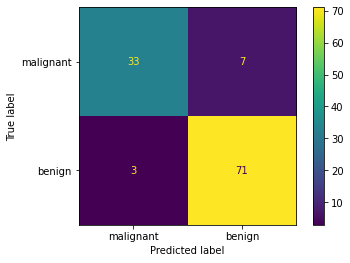

In [44]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(decision_tree_model, X_test, y_test, values_format='d',display_labels=breast_cancer.target_names)

malignant(악성종양) 을 Positive라고 하고, benign(양성종양) 을 Positive을 negative 라고 한다.  

추가적으로, malignant는 암을 지칭하는 종양이고, benign는 암이 아닌 종양이다.

__True Positive__ 는 malignant(악성종양)을 malignant(악성종양)이라고 올바르게 예측한 것이다.

__True Negative__ 는 benign(양성종양)을 benign(양성종양)이라고 올바르게 예측한 것이다.

__False Positive__ benign(양성종양)을 malignant(악성종양)이라고 잘못 예측한 것이다.

__False Negative__ malignant(악성종양)을 benign(양성종양)이라고 잘못 예측한 것이다.

여기서 __False Negative__ 의 경우, 암환자를 정상으로 예측 한 것이므로 생명을 위협할 수 있는 중요한 요소이다.

따라서 __Recall(재현율)__ 로 모델을 평가하겠다.

각 모델의 classification_report 에서 0의 recall 값을 가져와 아래에 정리했다.

|model|recall|
|:----:|:----:|
|Decision Tree|0.82|
|Random Forest|1.00|
|SVM|0.72|
|SGD Classifier|0.65|
|Logistic Regression|0.82|

Random Forest 모델의 Recall 재현율이 100% 로 가장 높게 나왔다. 그러므로 Random Forest를 이용하여 유방암 여부를 예측하면 가장 성능이 좋다.

# 프로젝트 정리

여러 데이터들을 관찰하고 다루면서 해당 데이터에 맞는 분류 모델을 알아보았다. 데이터 마다, 모델 마다 약간의 성능 차이가 있었고 전체적으로는 Random Forest 모델의 성능이 높은 것을 확인했다.  

하지만 Random Forest 의 느린 속도와 많은 메모리 차지와 같은 단점이 존재해 상황에 맞는 모델을 고르는 것이 중요하다.
  
또한 데이터의 종류나 성질에 따라 여러가지 모델들로 학습시켜보고 최적의 모델을 선택하는 것이 중요하다.

마지막으로 모델의 성능을 평가 할때에도 해당 데이터의 이해도를 바탕으로 최적의 척도로 모델 성능을 평가해야한다.